In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
#Import data
nyc_crime = pd.read_excel('nyc_crime_2013.xls', sheet_name=0, header=4)

#Rename column to make easier to work with
nyc_crime.columns.values[8] = 'property_crime'

#Cut off last three lines which are headers
nyc_crime = nyc_crime[:348]


In [3]:
#Remove New York City outlier, since it is so far removed from the rest of the datapoints
nyc_crime = nyc_crime.drop(nyc_crime['Population'].idxmax())

#Add dummy variables for burglary and robbery, 
#since they seem like they would be closely associated with proprty crime.
nyc_crime['burglary_dummy'] = np.where((nyc_crime['Burglary']>0), 1,0)
nyc_crime['robbery_dummy'] = np.where((nyc_crime['Robbery']>0), 1,0)

#Add transformations to experiment with.
nyc_crime['pop_sqrt'] = np.sqrt(nyc_crime['Population'])
nyc_crime['prop_crime_sqrt'] = np.sqrt(nyc_crime['property_crime'])

In [4]:
#Based on R-squared values, the square-root transformation was clearly the best fit.
#Add two features to create better fit. 

regr = linear_model.LinearRegression()
Y = nyc_crime['prop_crime_sqrt'].values.reshape(-1, 1)
X = nyc_crime[['pop_sqrt', 'robbery_dummy', 'burglary_dummy']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.16162006  2.32713161  0.30054016]]

Intercept: 
 [-4.14090464]

R-squared:
0.82142829365


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [5]:
data = nyc_crime[['pop_sqrt'] + ['robbery_dummy'] + ['burglary_dummy']]
target = nyc_crime['prop_crime_sqrt']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     data, target, test_size=0.4)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print('Score:', model.score(X_test, y_test))


(208, 3) (208,)
(139, 3) (139,)
Score: 0.805186495667


In [7]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
# Perform 15-fold cross validation
scores = cross_val_score(model, data, target, cv=15)
print('Cross-validated scores:', scores)


Cross-validated scores: [ 0.87796708  0.86795849  0.91406006  0.49326738  0.76554299  0.74108896
  0.79629915  0.23835757  0.83706065  0.72486614  0.47111539  0.83598952
  0.82735851  0.85316785  0.59199878]


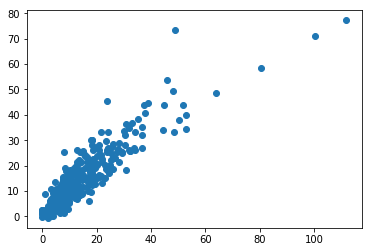

In [9]:
# Make cross validated predictions
predictions = cross_val_predict(model, data, target, cv=15)
plt.scatter(target, predictions)
plt.show()

In [10]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

data = nyc_crime
linear_formula = 'prop_crime_sqrt ~ pop_sqrt + robbery_dummy + burglary_dummy'

In [11]:
lm = smf.ols(formula=linear_formula, data=data).fit()
print(lm.params)
print(lm.pvalues)
print(lm.rsquared)

Intercept        -4.140905
pop_sqrt          0.161620
robbery_dummy     2.327132
burglary_dummy    0.300540
dtype: float64
Intercept          9.775443e-04
pop_sqrt          1.913479e-106
robbery_dummy      1.525532e-03
burglary_dummy     8.221926e-01
dtype: float64
0.82142829365


### New Dataset

In [12]:
#Import data
ny_crime_14 = pd.read_excel('ny_crime_14.xls', sheet_name=0, header=4)

#Rename column to make easier to work with
ny_crime_14.columns.values[8] = 'property_crime'

#Cut off last three lines which are headers
ny_crime_14 = ny_crime_14[:364]
ny_crime_14

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,property_crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1851.0,0.0,0.0,NaN,0.0,0.0,0.0,11.0,1.0,10.0,0.0,0.0
1,Addison Town and Village,2568.0,2.0,0.0,NaN,0.0,1.0,1.0,49.0,1.0,47.0,1.0,0.0
2,Afton Village4,820.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Akron Village,2842.0,1.0,0.0,NaN,0.0,0.0,1.0,17.0,0.0,17.0,0.0,0.0
4,Albany4,98595.0,802.0,8.0,54.0,NaN,237.0,503.0,3888.0,683.0,3083.0,122.0,12.0
5,Albion Village4,5872.0,26.0,0.0,3.0,NaN,2.0,21.0,204.0,41.0,159.0,4.0,0.0
6,Alexandria Bay Village4,1107.0,0.0,0.0,0.0,NaN,0.0,0.0,7.0,2.0,5.0,0.0,0.0
7,Alfred Village4,4032.0,11.0,1.0,1.0,NaN,0.0,9.0,30.0,6.0,24.0,0.0,0.0
8,Altamont Village4,1723.0,1.0,0.0,0.0,NaN,0.0,1.0,2.0,2.0,0.0,0.0,0.0
9,Amherst Town4,118860.0,128.0,1.0,16.0,NaN,43.0,68.0,2066.0,176.0,1846.0,44.0,2.0


In [13]:
#Remove New York City outlier, since it is so far removed from the rest of the datapoints
ny_crime_14 = ny_crime_14.drop(ny_crime_14['Population'].idxmax())

#Add dummy variables for burglary and robbery, 
#since they seem like they would be closely associated with proprty crime.
ny_crime_14['burglary_dummy'] = np.where((ny_crime_14['Burglary']>0), 1,0)
ny_crime_14['robbery_dummy'] = np.where((ny_crime_14['Robbery']>0), 1,0)

#Add transformations to experiment with.
ny_crime_14['pop_sqrt'] = np.sqrt(ny_crime_14['Population'])
ny_crime_14['prop_crime_sqrt'] = np.sqrt(ny_crime_14['property_crime'])

In [14]:
#Based on R-squared values, the square-root transformation was clearly the best fit.
#Add two features to create better fit. 

regr = linear_model.LinearRegression()
Y = ny_crime_14['prop_crime_sqrt'].values.reshape(-1, 1)
X = ny_crime_14[['pop_sqrt', 'robbery_dummy', 'burglary_dummy']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.16650097  0.8646451   1.4797296 ]]

Intercept: 
 [-5.51754407]

R-squared:
0.824733038413


In [15]:
data = ny_crime_14[['pop_sqrt'] + ['robbery_dummy'] + ['burglary_dummy']]
target = ny_crime_14['prop_crime_sqrt']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     data, target, test_size=0.4)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print('Score:', model.score(X_test, y_test))


(217, 3) (217,)
(146, 3) (146,)
Score: 0.815183597883


In [17]:
# Perform 15-fold cross validation
scores = cross_val_score(model, data, target, cv=15)
print('Cross-validated scores:', scores)


Cross-validated scores: [ 0.90972825  0.86032277  0.93084873  0.55894495  0.61131461  0.80581005
  0.73007314  0.13978179  0.66503747  0.72966159  0.40249562  0.8407914
  0.81672778  0.87747837  0.79014612]


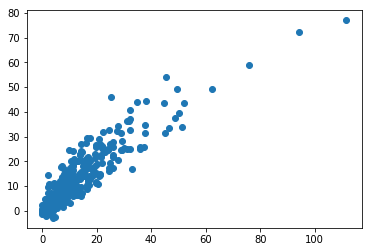

In [18]:
# Make cross validated predictions
predictions = cross_val_predict(model, data, target, cv=15)
plt.scatter(target, predictions)
plt.show()

In [19]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

data = ny_crime_14
linear_formula = 'prop_crime_sqrt ~ pop_sqrt + robbery_dummy + burglary_dummy'

In [20]:
lm = smf.ols(formula=linear_formula, data=data).fit()
print(lm.params)
print(lm.pvalues)
print(lm.rsquared)

Intercept        -5.517544
pop_sqrt          0.166501
robbery_dummy     0.864645
burglary_dummy    1.479730
dtype: float64
Intercept          1.045194e-08
pop_sqrt          1.067572e-109
robbery_dummy      2.212443e-01
burglary_dummy     1.469406e-01
dtype: float64
0.824733038413


### Combining Years

In [21]:
ny_crime_comb = nyc_crime.append(ny_crime_14)
ny_crime_comb

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,property_crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,burglary_dummy,robbery_dummy,pop_sqrt,prop_crime_sqrt
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,1,0,43.139309,3.464102
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,1,0,50.764161,4.898979
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,1,0,53.347915,4.000000
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN,1,1,312.979233,63.953108
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN,1,1,79.924965,14.933185
5,Alfred Village,4089.0,5.0,0.0,NaN,0.0,3.0,2.0,46.0,10.0,36.0,0.0,NaN,1,1,63.945289,6.782330
6,Allegany Village,1781.0,3.0,0.0,NaN,0.0,0.0,3.0,10.0,0.0,10.0,0.0,0.0,0,0,42.201896,3.162278
7,Amherst Town,118296.0,107.0,1.0,NaN,7.0,31.0,68.0,2118.0,204.0,1882.0,32.0,3.0,1,1,343.941856,46.021734
8,Amityville Village,9519.0,9.0,0.0,NaN,2.0,4.0,3.0,210.0,16.0,188.0,6.0,1.0,1,1,97.565363,14.491377
9,Amsterdam,18182.0,30.0,0.0,NaN,0.0,12.0,18.0,405.0,99.0,291.0,15.0,0.0,1,1,134.840647,20.124612


In [22]:
#Based on R-squared values, the square-root transformation was clearly the best fit.
#Add two features to create better fit. 

regr = linear_model.LinearRegression()
Y = ny_crime_comb['prop_crime_sqrt'].values.reshape(-1, 1)
X = ny_crime_comb[['pop_sqrt', 'robbery_dummy', 'burglary_dummy']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.16377604  1.63560145  1.04908998]]

Intercept: 
 [-4.96804151]

R-squared:
0.822717660983


In [23]:
data = ny_crime_comb[['pop_sqrt'] + ['robbery_dummy'] + ['burglary_dummy']]
target = ny_crime_comb['prop_crime_sqrt']


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     data, target, test_size=0.4)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print('Score:', model.score(X_test, y_test))


(426, 3) (426,)
(284, 3) (284,)
Score: 0.806864919278


In [25]:
# Perform 15-fold cross validation
scores = cross_val_score(model, data, target, cv=30)
print('Cross-validated scores:', scores)


Cross-validated scores: [ 0.87765879  0.8784814   0.90929685  0.50725085  0.61039843  0.83868455
  0.76630838  0.32077877  0.80906729  0.61109353  0.85518727  0.83195191
  0.83137667  0.82725768  0.83493071  0.81826469  0.8853244   0.90158048
  0.4153461   0.82970045  0.62914919  0.7380586  -0.22286852  0.75853331
  0.73823857  0.45392936  0.83869006  0.80061557  0.88182208  0.777502  ]


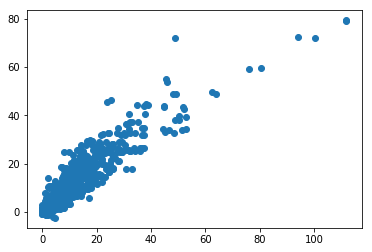

In [26]:
# Make cross validated predictions
predictions = cross_val_predict(model, data, target, cv=30)
plt.scatter(target, predictions)
plt.show()

In [27]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

data = ny_crime_comb
linear_formula = 'prop_crime_sqrt ~ pop_sqrt + robbery_dummy + burglary_dummy'

In [28]:
lm = smf.ols(formula=linear_formula, data=data).fit()
print(lm.params)
print(lm.pvalues)
print(lm.rsquared)

Intercept        -4.968042
pop_sqrt          0.163776
robbery_dummy     1.635601
burglary_dummy    1.049090
dtype: float64
Intercept          8.247243e-11
pop_sqrt          1.045899e-214
robbery_dummy      1.277429e-03
burglary_dummy     1.971206e-01
dtype: float64
0.822717660983


### Conclusion

My multiple linear regression model worked equally well across datasets of crime in New York state from 2013 and 2014, as well as the combined dataset. I chose a cross validation method over a hold out method to get more robust and meaningful results. Instead of holding out a small sample and just testing based on that, the cross validation tested on the entire sample over 15 folds in the individual years, and 30 folds in the combined sample of both years. Because my model worked equally well on both samples, based on the test statistics, I did not feel the need to iterate the model further. 

Based on the cross validation results, the model does not seem to be overfit. The numbers are fairly consistent between the differetn folds, with most of them falling in a somewhat narrow range. There were, however, a couple of outlier folds and the folds were consistently placed between the two datasets. This leads me to believe that there was a section of the data that did not fit the model very well, and since the city/town names are consistent over both years, these folds may correlate to a specific section of the alphabetical data. 